In [1]:
# Add all necessary imports here
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.reload_library()
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

### Cover Slide 1

### Cover Slide 2

# Sobre el autor

* BSc Ciencia de la computación por la Universidade Federal do Tocantins - Brazil
* Desarrollador de software en MercadoLivre Brasil
* 6 años de experiencia como desarrollador de Python
* 2 años de experiencia como desarrollador de Golang
* Entusiasta de Ciencia de Datos

# Que es EDA?

**EDA** viene de **Exploratory Data Analysis** ó en español **Analisis exploratório de datos**.

**EDA** es un conjunto de:
 * Procedimientos para el análisis de datos.
 * Técnicas de interpretación de resultados
 * Herramientas de carga y visualización de datos.

Para que sea más fácil, más preciso y más asertivo analizar un conjunto de datos.

"*If you torture the data long enough, it will confess to anything*"

"*Si tortura los datos el tiempo suficiente, confesará cualquier cosa*"

**Darrell Huff, How to Lie With Statistics (1954).**


# Porque EDA?

* Garantiza la entrega de resultados con base tecnica
* Garantiza que las si esta haciendo las preguntas correctas
* Prueba las concepciones del negocio
* Crea un contexto y genera mejor entendimiento de la data
* Hace posible la descobierta de nuevos insigths

![EDA Cycle](img/eda_cycle.png)

A tener en cuenta:
 * Nunca has terminado con EDA. Con cada resultado, es una buena práctica asegurarse de que el resultado tenga sentido y probar otras preguntas que surjan debido a ello.
 * Mantén la mente abierta. Se supone que debes desafiar tus suposiciones y las de las partes interesadas para las que estás realizando el análisis.
 * Repita EDA para cada nuevo problema.

# EDA in practica - Titanic Dataset

Este dataset contiene información demográfica y de pasajeros de 891 de los 2224 pasajeros y tripulantes a bordo del Titanic. Puede ver una descripción de este conjunto de datos en el sitio web de Kaggle, donde se obtuvieron los datos (https://www.kaggle.com/c/titanic/data).

## Preguntas

- ¿Fue la posición socioeconómica un factor en la tasa de supervivencia?
- ¿La edad, independientemente del sexo, determinó tus posibilidades de supervivencia?
- ¿Las mujeres y los niños tenían preferencia en los botes salvavidas?

## Importar las bibliotecas

In [23]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import missingno as msno
import numpy as np


## Carga el dataset

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Chequear el shape del dataset

In [5]:
df.shape

(891, 12)

## Dataset bien arreglado


El concepto de Hadley Wickham de uno dataset bien arreglado puede ser resumido en:

>  - Cada variable forma una coluna
>  - Cada observación forma una linea
>  - Cada tipo de unidade de observacióin forma una tablea

Una descrición mas completa de dataset bien arreglado puede ser encontrado en el archivo [pdf](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf).

Los conjuntos de datos en este formato hacen posible un análisis muy más simple. El primer pasó es intentar hacer un clean up en el dataset.

## Dataset clean up

Vamos hacer el clean up en 3 pasos:
 - Borrar entradas duplicadas
 - Borrar columnas innecesarias
 - Solucionar problemas de formato y falta de datos

## Eliminar entradas duplicadas

In [6]:
player_cols = ["Name", "Sex", "Age"]

In [7]:
# Count the unique variables (if we got different weight values, 
# for example, then we should get more than one unique value in this groupby)
all_cols_unique_players = df.groupby('PassengerId').agg({col:'nunique' for col in player_cols})
all_cols_unique_players.head()

,Name,Sex,Age
PassengerId,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1


## Sanity Check

In [8]:
# If all values are the same per passenger then this should True
all_cols_unique_players[all_cols_unique_players > 1].dropna().shape[0] == 0

True

## Borrar columnas innecesarias

In [9]:
titanic_data_cleaned = df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Visualize the missing-ness of data

https://github.com/ResidentMario/missingno

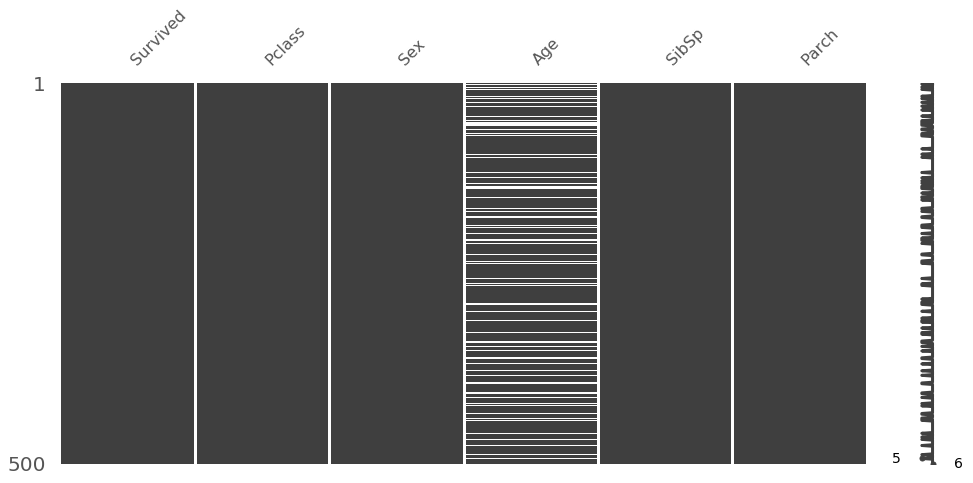

In [10]:
msno.matrix(titanic_data_cleaned.sample(500), figsize=(16, 7), width_ratios=(15, 1))

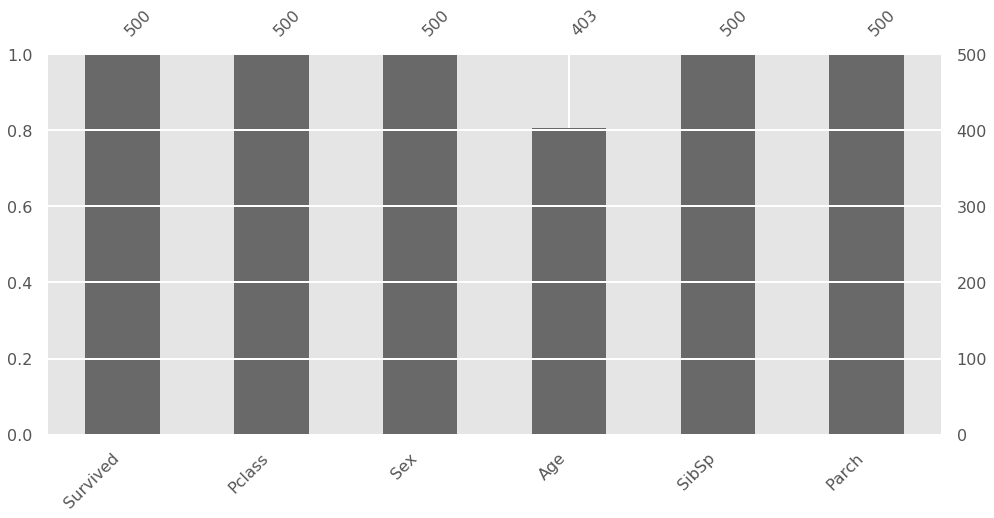

In [11]:
msno.bar(titanic_data_cleaned.sample(500),
            figsize=(16, 7),)

In [12]:
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
print("All passagers:", len(titanic_data_cleaned))
print("Male Age nulls:", len(titanic_data_cleaned[missing_age_bool & (titanic_data_cleaned.Sex == "male")].isnull()))
print("Female Age nulls:", len(titanic_data_cleaned[missing_age_bool & (titanic_data_cleaned.Sex == "female")].isnull()))

All passagers: 891
Male Age nulls: 124
Female Age nulls: 53


## Exploración y visualización.

In [13]:
titanic_data_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [14]:
# Age min at 0.42 looks a bit weird so give a closer look
titanic_data_cleaned[titanic_data_cleaned['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


## Chequear limites

In [15]:
# Taking a look at some survival rates for babies
youngest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].min()
youngest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].min()
oldest_to_survive = titanic_data_cleaned[titanic_data_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_cleaned[titanic_data_cleaned['Survived'] == False]['Age'].max()

print('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


# Preguntas

# 1. ¿Fue la posición socioeconómica un factor en la tasa de supervivencia?

In [16]:
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        raw survival rate and as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)

    return grouped_by_survived_sex, survived_sex_pct


In [17]:
f_raw_c1, f_p_c1 = survival_rate(1,'female')
m_raw_c1, m_p_c1 = survival_rate(1,'male')
f_raw_c2, f_p_c2 = survival_rate(2,'female')
m_raw_c2, m_p_c2 = survival_rate(2,'male')
f_raw_c3, f_p_c3 = survival_rate(3,'female')
m_raw_c3, m_p_c3 = survival_rate(3,'male')

In [18]:
s_rate = [
    {"class": "1", "female_total": f_raw_c1, "female_percentage": f_p_c1, "male_total": m_raw_c1, "male_percentage": m_p_c1,},
{"class": "2", "female_total": f_raw_c2, "female_percentage": f_p_c2, "male_total": m_raw_c2, "male_percentage": m_p_c2,},
{"class": "3", "female_total": f_raw_c3, "female_percentage": f_p_c3, "male_total": m_raw_c3, "male_percentage": m_p_c3,}
]
s_rate_df = pd.DataFrame(s_rate)
s_rate_df["total_survived"] = s_rate_df.female_total + s_rate_df.male_total 
s_rate_df

,class,female_percentage,female_total,male_percentage,male_total,total_survived
0,1,96.81,91.0,36.89,45.0,136.0
1,2,92.11,70.0,15.74,17.0,87.0
2,3,50.00,72.0,13.54,47.0,119.0


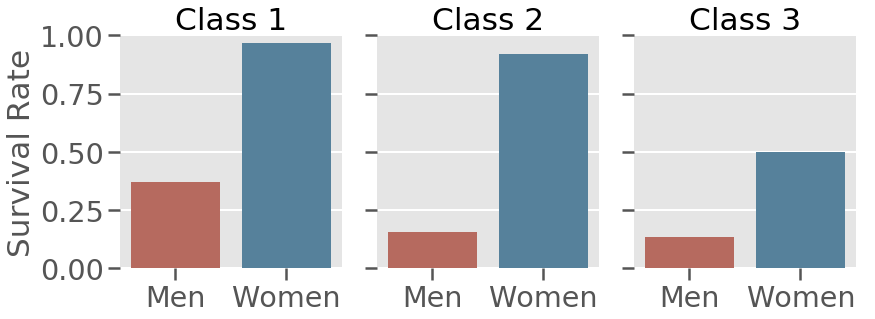

In [19]:
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_data_cleaned, saturation=.5, kind="bar", ci=None, size=5, aspect=.8)
g.set_axis_labels('', 'Survival Rate').set_xticklabels(["Men", "Women"]).set_titles("Class {col_name}").set(ylim=(0, 1)).despine(left=True, bottom=True)

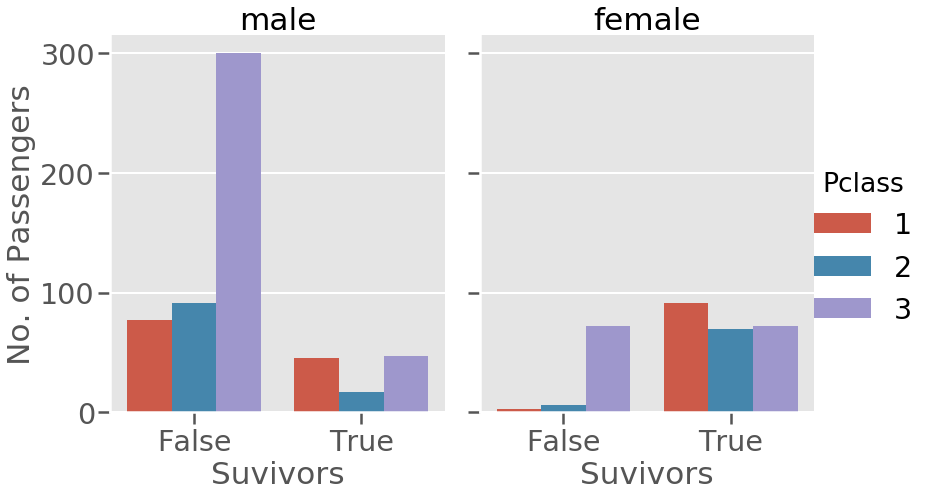

In [20]:
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)
g.set_axis_labels('Suvivors', 'No. of Passengers').set_xticklabels(["False", "True"]).set_titles('{col_name}')

Según los números brutos, parecería que los pasajeros de la Clase 3 tenían una tasa de supervivencia similar a los de la Clase 1 con 119 y 136 pasajeros que sobrevivieron, respectivamente. Sin embargo, al observar los porcentajes de los pasajeros totales por clase y los números totales en cada clase, se puede suponer que un pasajero de la Clase 1 tiene aproximadamente **2.5 veces más probabilidades de sobrevivir que un pasajero en la Clase 3**.

La posición socioeconómica fue un factor en la tasa de supervivencia de los pasajeros.

# 2. ¿La edad, independientemente del sexo, determinó tus posibilidades de supervivencia?

In [21]:
titanic_data_age_cleaned = titanic_data_cleaned.dropna()
# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()

In [24]:
print('Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived),
        np.round(mean_age_died), oldest_to_survive, oldest_to_die))

Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


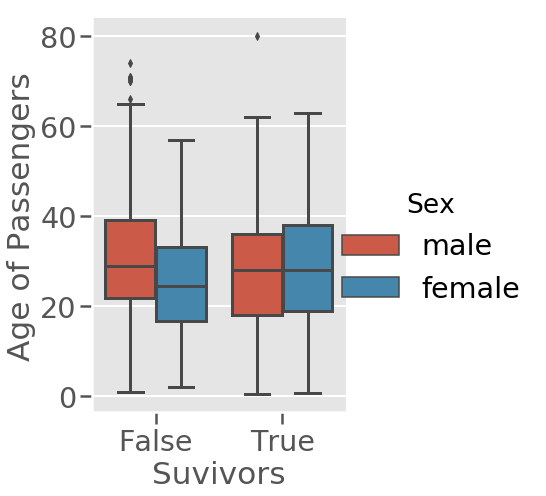

In [25]:
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)
g.set_axis_labels('Suvivors', 'Age of Passengers').set_xticklabels(["False", "True"])

Según el boxplot anterior y los datos calculados, parecería que:

- Independientemente del sexo y la clase, la edad no fue un factor decisivo en la tasa de supervivencia de los pasajeros.
- La edad promedio de los que sobrevivieron e incluso de los que no sobrevivieron estuvo en línea

# 3. ¿Las mujeres y los niños tenían preferencia en los botes salvavidas?

Supuesto: con **hijo** no clasificado en los datos, tendré que asumir un punto de corte. Por lo tanto, utilizaré el estándar actual de menores de 18 años como aquellos que se considerarán como niños o adultos.

## Crear categorías mas alto nível

In [26]:
titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'female') &
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'male') &
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'


In [27]:
pd.DataFrame(titanic_data_age_cleaned.groupby(['Category','Survived']).size())

0
Category Survived     
Child    0          52
         1          61
Man      0         325
         1          70
Woman    0          47
         1         159

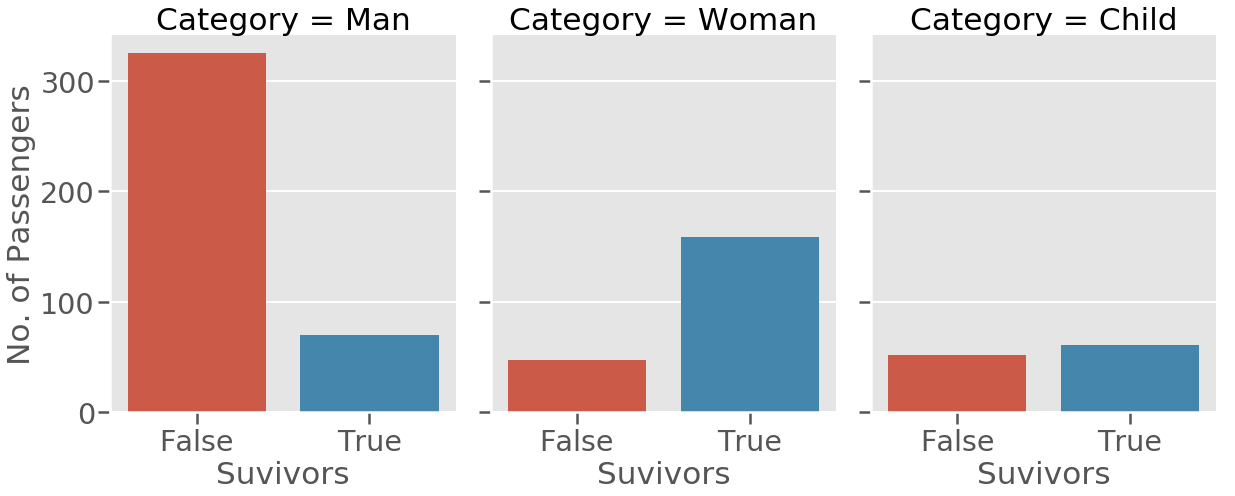

In [28]:
g = sns.factorplot('Survived', col='Category', data=titanic_data_age_cleaned, kind='count', size=7, aspect=.8)
(g.set_axis_labels('Suvivors', 'No. of Passengers').set_xticklabels(['False', 'True']))

- Los datos, y más aún, los gráficos tienden a apoyar la idea de que "las mujeres y los niños primero" posiblemente influyeron en la supervivencia de varias personas. 
- Es un poco sorprendente que haya más niños que no sobrevivieron, pero esto podría atribuirse a la mala representación de la edad que se considera un límite para los adultos, es decir, si en el siglo XX alguien de 15-17 años fuera considerado adulto, no lo haría. Si cambiamos la suposición de que edad tiene un niño, cambiaría el resultado de los datos anteriores y posiblemente aumentaría el número de niños que sobrevivieron.

# Conclusion

- Los resultados del análisis, aunque tentativos, parecerían indicar que la clase y el sexo, es decir, ser una mujer con una posición socioeconómica superior (primera clase), le daría una mejor oportunidad de supervivencia cuando ocurrió la tragedia en el Titanic. 
- La edad no parecía ser un factor importante. 
- Siendo un hombre de tercera clase, le daba a uno la menor posibilidad de supervivencia. 
- Las mujeres y los niños, en todas las clases, tienden a tener una tasa de supervivencia más alta que los hombres en general, pero de ninguna manera ser un niño o una mujer garantiza la supervivencia. Aunque, en general, los niños acompañados por padres tuvieron la mejor tasa de supervivencia en más del 50%.

### Q&A Slide